In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import pylab as plt
np.random.seed(10)

In [2]:
learning_rate = 0.01
training_steps = 50000
display_step = 1000

In [3]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1], dtype="float32")
Xs = StandardScaler().fit_transform(X.reshape(-1, 1))

Y = X*X - 10*X + 10 + 5 * np.random.random(len(X))
# Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3], dtype="float32")
# Y = Y.reshape(-1,1)

In [4]:
W1 = tf.Variable(np.random.randn(), name="weight1", dtype="float32")
W2 = tf.Variable(np.random.randn(), name="weight1", dtype="float32")
W3 = tf.Variable(np.random.randn(), name="weight2")
b = tf.Variable(np.random.randn(), name="bias")

def quad_regression(x):
    return W1 * pow(x, 3) + W2 * tf.pow(x,2) + W3 * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.Adadelta(learning_rate)

In [5]:
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = quad_regression(X)
#         print(pred)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W1, W2, W3, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W1, W2, W3, b]))

In [6]:
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = quad_regression(Xs)
        loss = mean_square(pred, Y)
        print("step:", str(step), ", loss: ", str(loss.numpy()), ", W1, W2, W3, b: ", W1.numpy(), W2.numpy(), W2.numpy(), b.numpy())

step: 1000 , loss:  142.47427 , W1, W2, W3, b:  0.44852713 -0.2550781 -0.2550781 1.7625791
step: 2000 , loss:  141.29956 , W1, W2, W3, b:  0.41917986 -0.28443313 -0.28443313 1.7331921
step: 3000 , loss:  139.96846 , W1, W2, W3, b:  0.38485926 -0.31877083 -0.31877083 1.6987809
step: 4000 , loss:  138.57373 , W1, W2, W3, b:  0.3475575 -0.35610345 -0.35610345 1.6613159
step: 5000 , loss:  137.18108 , W1, W2, W3, b:  0.30877912 -0.394931 -0.394931 1.6222802
step: 6000 , loss:  135.83804 , W1, W2, W3, b:  0.26975816 -0.4340268 -0.4340268 1.582868
step: 7000 , loss:  134.57927 , W1, W2, W3, b:  0.23154645 -0.4723406 -0.4723406 1.5441178
step: 8000 , loss:  133.42892 , W1, W2, W3, b:  0.19508019 -0.5089473 -0.5089473 1.5069141
step: 9000 , loss:  132.40361 , W1, W2, W3, b:  0.16122028 -0.5429991 -0.5429991 1.4720515
step: 10000 , loss:  131.51486 , W1, W2, W3, b:  0.13081303 -0.5736726 -0.5736726 1.440263
step: 11000 , loss:  130.7719 , W1, W2, W3, b:  0.10479224 -0.6000835 -0.6000835 1.41225

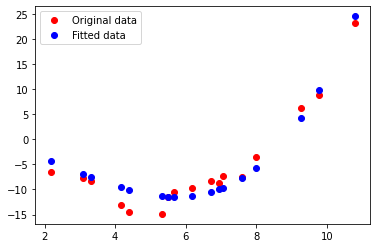

In [7]:
plt.plot(X.reshape(-1,1), Y, 'ro', label='Original data')
plt.plot(X.reshape(-1,1), np.array(W1 * X*X*X + W2 * X * X + W3 * X + b), 'bo',label='Fitted data')
plt.legend()
plt.show()